<a href="https://colab.research.google.com/github/SudeshnaPahari/Real-estate-problem-solving-using-regression-algorithm/blob/main/Copy_of_Real_estate_problem_solving_using_regression_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
Raw_Housing_Prices = pd.read_csv('Raw_Housing_Prices.csv')
Raw_Housing_Prices.head()
data= pd.read_csv('Raw_Housing_Prices.csv')
data['mean_sales']= data['Sale Price'].mean()
data['mean_sales'].head()

0    540198.435744
1    540198.435744
2    540198.435744
3    540198.435744
4    540198.435744
Name: mean_sales, dtype: float64

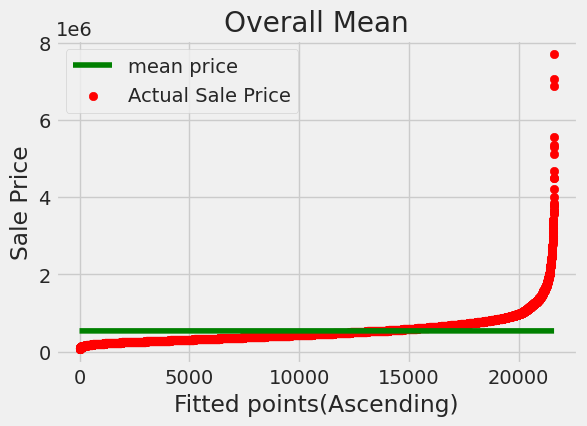

In [ ]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['mean_sales'].sort_values(),color='green',label='mean price')
plt.xlabel('Fitted points(Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend()

In [ ]:
grades_mean=data.pivot_table(values='Sale Price', columns='Overall Grade', aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale Price,142000.0,3.710769e+06,205666.666667,214381.034483,248523.971074,301916.570658,402604.370865,542892.66271,773738.22218,1.239055e+06


In [ ]:
data['grade_mean']=0
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
data['grade_mean'].head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    402604.370865
1    402604.370865
2    301916.570658
3    402604.370865
4    542892.662710
Name: grade_mean, dtype: float64

In [ ]:
gradewise_list=[]
for i in range(1,11):
  k= data["Sale Price"][data["Overall Grade"]==i]
  gradewise_list.append(k) 

In [ ]:
classwise_list=[]
for i in range(1,11):
  k= data["Sale Price"][data["Overall Grade"]==i]
  classwise_list.append(k) 

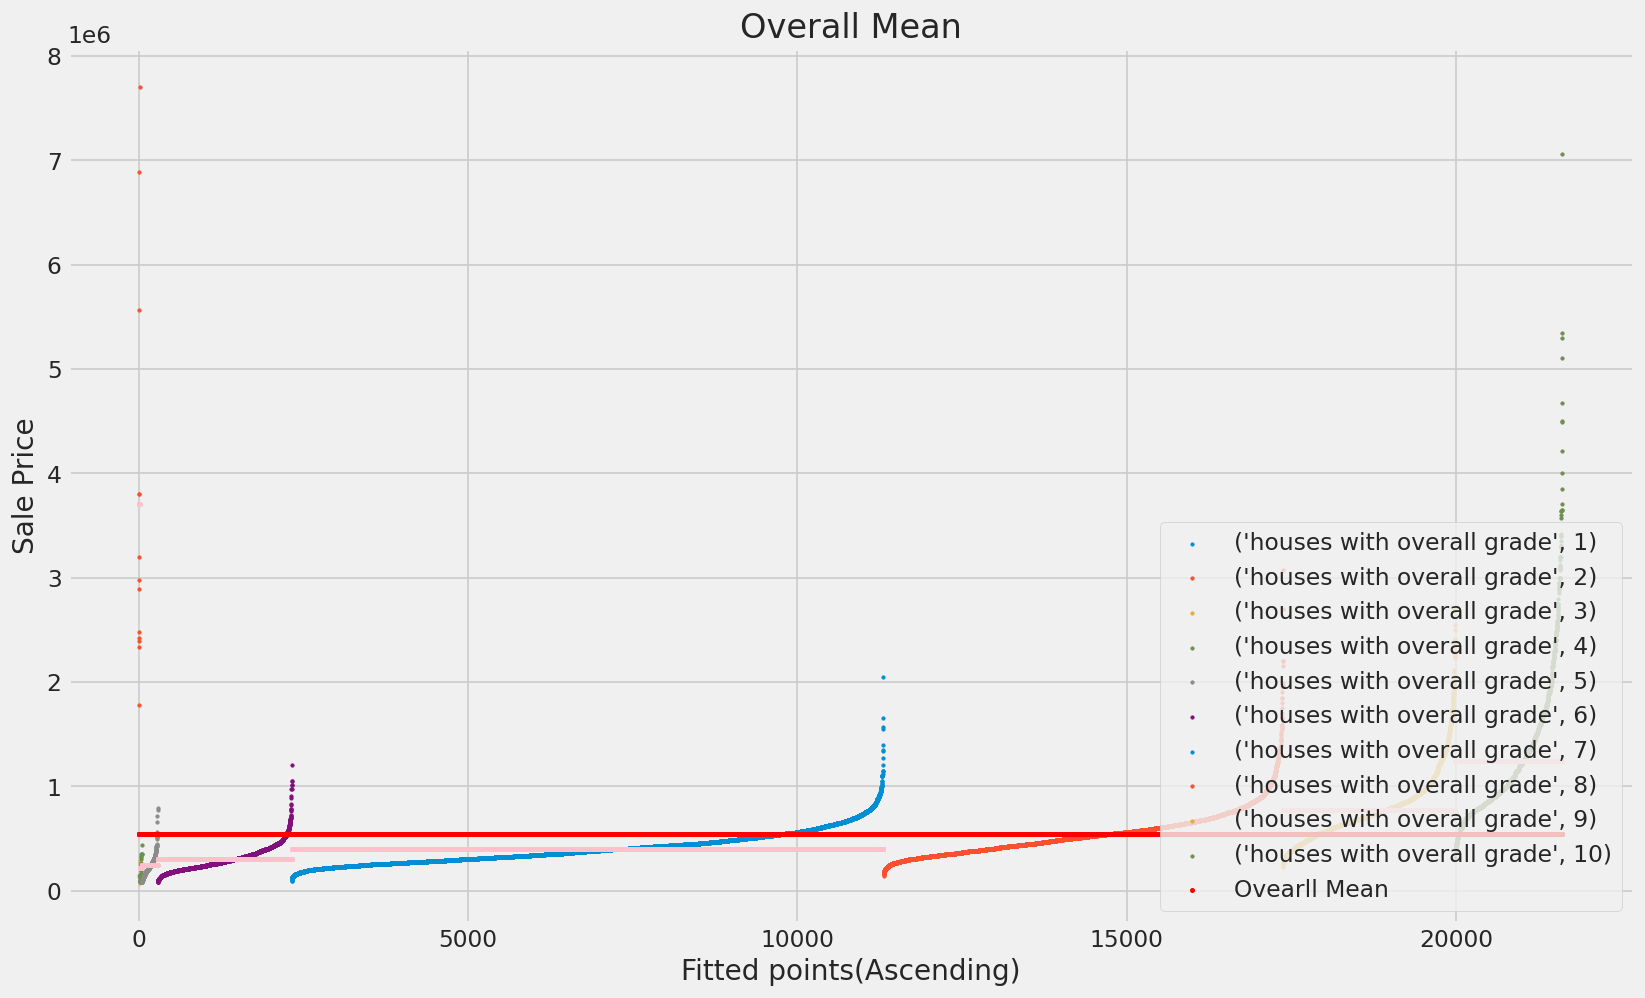

In [ ]:
plt.figure(dpi=120,figsize=(15,9))
z=0
for i in range(1,11):
  points=[k for k in range(z,z+ len(classwise_list[i-1]))]
  plt.scatter(points, classwise_list[i-1].sort_values(),label=('houses with overall grade',i),s=4)
  plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],s=6, color= 'pink')
  z= max(points)+1
plt.scatter([q for q in range(0,z)],data['mean_sales'],color='red',label='Ovearll Mean',s=6)
plt.xlabel('Fitted points(Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc=4)